<a href="https://colab.research.google.com/github/RuwaAbey/Finaly_Year_Project_G09/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

2.5.1+cu121
True
Tesla T4


In [2]:
!pip install mmcv==1.5.0
!pip install fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.7/530.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 21.2 MB/s eta 0:00:00
  Created wheel for mmcv: filename=mmcv-1.5.0-py2.py3-none-any.whl size=807159 sha256=b34d8e06a06d9d53f3c1aac85638402c7a5a0bb337dc4b1b4599c81a9666835e
  Stored in directory: /root/.cache/pip/wheels/86/b4/5d/1250f6319cd64acea208a8cd5a3e600506381c05bd65343d22
Successfully built mmcv
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61396 sha256=ebcd9bbf3ab0ceb20bde12bbc070829d7c5288950a2bc50c46b36f2978210a7f
  Stored in directory: /root/

In [3]:
import mmcv
print(mmcv.__version__)

1.5.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My\ Drive/G_09

/content/drive/My Drive/G_09


In [ ]:
!git clone https://github.com/kennymckormick/pyskl.git

fatal: destination path 'pyskl' already exists and is not an empty directory.


In [6]:
%cd /content/drive/My\ Drive/G_09/pyskl

/content/drive/My Drive/G_09/pyskl


In [7]:
import pyskl
import numpy as np

In [8]:
import pickle

%cd /content/drive/My\ Drive/G09_Final_Year_Project/pkl

# Load the pickle file
with open('ntu60_hrnet.pkl', 'rb') as f:
    data = pickle.load(f)

# Check the top-level keys
print(data.keys())  # Should print: ['split', 'annotations']

/content/drive/My Drive/G09_Final_Year_Project/pkl
dict_keys(['split', 'annotations'])


.pkl file is a single dictionary  

This dictionary has 2 keys:  
- **split**  
- **annotations**  

## 1. Split  
The value associated with this key is another dictionary.  

**split (dictionary)**  
- **key (dictionary)** → split names  
- **value (list)** → list of video identifiers that belong to a specific clip  

## 2. Annotations  
The value associated with `annotations` is a list of skeleton annotations.  

- **frame_dir (str)**: The identifier of the corresponding video.  
- **total_frames (int)**: The number of frames in this video.  
- **img_shape (tuple[int])**: The shape of a video frame, a tuple with two elements, in the format of (height, width). Only required for 2D skeletons.  
- **original_shape (tuple[int])**: Same as `img_shape`.  
- **label (int)**: The action label.  
- **keypoint (np.ndarray, with shape $[M \times T \times V \times C]$)**: The keypoint annotation.  
  - $M$: number of persons  
  - $T$: number of frames (same as `total_frames`)  
  - $V$: number of keypoints (25 for NTURGB+D 3D skeleton, 17 for CoCo, 18 for OpenPose, etc.)  
  - $C$: number of dimensions for keypoint coordinates ($C=2$ for 2D keypoint, $C=3$ for 3D keypoint)  
- **keypoint_score (np.ndarray, with shape $[M \times T \times V]$)**: The confidence score of keypoints. Only required for 2D skeletons.  


In [9]:
# Access the split field
splits = data['split']
print(type(splits))

# Check split names
print(splits.keys())

#Access the annotations field
annotations = data['annotations']
print(type(annotations))



print(type(splits['xsub_train']))

# List video identifiers for the training split
train_videos = splits['xsub_train']
print(f"Number of training videos: {len(train_videos)}")
print(f"Sample training video ID: {train_videos[0]}")

<class 'dict'>
dict_keys(['xsub_train', 'xsub_val', 'xview_train', 'xview_val'])
<class 'list'>
<class 'list'>
Number of training videos: 40091
Sample training video ID: S001C001P001R001A001


In [10]:
annotations_sample = data['annotations'][1]
print(annotations_sample)

{'frame_dir': 'S001C001P001R001A002', 'label': 1, 'img_shape': (1080, 1920), 'original_shape': (1080, 1920), 'total_frames': 158, 'keypoint': array([[[[1040. ,  337.5],
         [1048. ,  324.2],
         [1035. ,  328.8],
         ...,
         [1035. ,  605.5],
         [1070. ,  693.5],
         [1044. ,  689. ]],

        [[1040. ,  337.5],
         [1048. ,  324.2],
         [1031. ,  324.2],
         ...,
         [1035. ,  605.5],
         [1070. ,  693.5],
         [1044. ,  689. ]],

        [[1039. ,  337.5],
         [1047. ,  324.2],
         [1034. ,  328.8],
         ...,
         [1034. ,  605.5],
         [1074. ,  693.5],
         [1047. ,  689. ]],

        ...,

        [[1043. ,  336. ],
         [1052. ,  327.5],
         [1034. ,  327.5],
         ...,
         [1039. ,  602.5],
         [1073. ,  697. ],
         [1047. ,  688.5]],

        [[1041. ,  333. ],
         [1049. ,  324.2],
         [1036. ,  324.2],
         ...,
         [1036. ,  605.5],
         [

In [11]:
annotations_sample['keypoint']

array([[[[1040. ,  337.5],
         [1048. ,  324.2],
         [1035. ,  328.8],
         ...,
         [1035. ,  605.5],
         [1070. ,  693.5],
         [1044. ,  689. ]],

        [[1040. ,  337.5],
         [1048. ,  324.2],
         [1031. ,  324.2],
         ...,
         [1035. ,  605.5],
         [1070. ,  693.5],
         [1044. ,  689. ]],

        [[1039. ,  337.5],
         [1047. ,  324.2],
         [1034. ,  328.8],
         ...,
         [1034. ,  605.5],
         [1074. ,  693.5],
         [1047. ,  689. ]],

        ...,

        [[1043. ,  336. ],
         [1052. ,  327.5],
         [1034. ,  327.5],
         ...,
         [1039. ,  602.5],
         [1073. ,  697. ],
         [1047. ,  688.5]],

        [[1041. ,  333. ],
         [1049. ,  324.2],
         [1036. ,  324.2],
         ...,
         [1036. ,  605.5],
         [1071. ,  693.5],
         [1045. ,  689. ]],

        [[1043. ,  336. ],
         [1052. ,  327.5],
         [1034. ,  327.5],
         ...,
 

**Key Point Array**

The shape of the array is represented as:

$$
\text{shape}([M \times T \times V \times C])
$$

Where:

- $M$: Number of persons.
- $T$: Number of frames (same as `total_frames`).
- $V$: Number of keypoints, e.g.:
  - 25 for NTURGB+D 3D skeleton.
  - 17 for CoCo.
  - 18 for OpenPose.
- $C$: Number of dimensions for keypoint coordinates, where:
  - $C=2$ for 2D keypoints.
  - $C=3$ for 3D keypoints.

**4D Array Review**

Consider an array with the shape $(a, b, c, d)$:

- $a$: Number of blocks of data.
- $b$: Number of matrices in each data block.
- $c$: Number of rows in each matrix.
- $d$: Each row contains $d$ elements. For instance:
  - $d=2$ for 2D keypoints (e.g., $(x, y)$).
  - $d=3$ for 3D keypoints (e.g., $(x, y, z)$).


In [12]:
shape = annotations_sample['keypoint'].shape
print(shape)

(1, 158, 17, 2)


Consider the above array $(1, 158, 17, 2)$:

- $1$: 1 block of dara.
- $158$: Each block contain 158 matrices.
- $17$: Each matri has 17 rows.
- $2$: Each ro haz 2 elements

This means that this video contain data of

- $M$: 1
- $T$: 158
- $V$: Number of keypoints, e.g.:
  - 17 for CoCo.
- $C$: Number of dimensions for keypoint coordinates, where:
  - 2D keypoints.


In [13]:
annotations_sample['keypoint_score']

array([[[0.9766, 0.9824, 0.9346, ..., 0.898 , 0.9414, 0.9307],
        [0.979 , 0.9824, 0.933 , ..., 0.8887, 0.939 , 0.94  ],
        [0.9766, 0.969 , 0.9507, ..., 0.8994, 0.937 , 0.935 ],
        ...,
        [0.9478, 0.9395, 0.896 , ..., 0.876 , 0.9004, 0.913 ],
        [0.964 , 0.9487, 0.965 , ..., 0.8936, 0.9346, 0.925 ],
        [0.9424, 0.937 , 0.897 , ..., 0.874 , 0.902 , 0.9   ]]],
      dtype=float16)

In [14]:
shape = annotations_sample['keypoint_score'].shape
print(shape)

(1, 158, 17)


**UniformSampleFrames**

In [15]:
from pyskl.datasets.pipelines import pose_related

  if event.key is 'enter':



In [19]:
from pyskl.datasets.pipelines.sampling import UniformSampleFrames

# Initialize the sampler with desired parameters
uniform_sample = UniformSampleFrames(clip_len=48, p_interval=1,num_clips=1, seed=255)

# Assuming 'results' is a dictionary containing 'total_frames', 'start_index', etc.
results = {
    'total_frames': annotations_sample['total_frames'],  # Total number of frames in the video
    'start_index': 0,  # Starting index for sampling
    'test_mode': False,  # Indicating whether it's testing or training
}

# Call the sampler to sample the frames
processed_results = uniform_sample(results)

# The processed results will contain the 'frame_inds' with the sampled frames
print(processed_results['frame_inds'])

[  2   3   8  11  14  17  20  24  26  30  33  37  39  44  46  50  54  55
  59  63  65  71  73  75  79  84  87  89  93  97 100 104 107 109 112 117
 120 123 125 129 132 137 139 141 144 148 152 154]


In [ ]:
from pyskl.datasets.pipelines.sampling import UniformSampleFrames

# Initialize the sampler with desired parameters
uniform_sample = UniformSampleFrames(clip_len=48, p_interval=1,num_clips=2, seed=255)

# Assuming 'results' is a dictionary containing 'total_frames', 'start_index', etc.
results = {
    'total_frames': annotations_sample['total_frames'],  # Total number of frames in the video
    'start_index': 0,  # Starting index for sampling
    'test_mode': False,  # Indicating whether it's testing or training
    'keypoint': annotations_sample['keypoint'],  # Including the 'keypoint' data
    'keypoint_score': annotations_sample['keypoint_score'],  # Including the 'keypoint_score' data
    'img_shape': (1080, 1920)
}

# Call the sampler to sample the frames
processed_results = uniform_sample(results)

# The processed results will contain the 'frame_inds' with the sampled frames
print(processed_results['frame_inds'])

[  1   3   7   9  13  16  20  24  26  29  32  37  40  45  46  51  52  58
  60  64  68  70  72  76  80  84  86  90  94  96 101 102 107 109 112 115
 120 121 127 128 133 136 138 142 146 148 153 157   0   4   8  11  13  16
  22  23  28  31  34  37  39  43  46  50  52  56  61  63  66  71  72  76
  79  82  85  90  92  96 100 104 106 108 111 115 119 122 126 129 132 134
 139 143 147 150 151 156]


In [ ]:
print(processed_results)

{'total_frames': 158, 'start_index': 0, 'test_mode': False, 'keypoint': array([[[[1040. ,  337.5],
         [1048. ,  324.2],
         [1035. ,  328.8],
         ...,
         [1035. ,  605.5],
         [1070. ,  693.5],
         [1044. ,  689. ]],

        [[1040. ,  337.5],
         [1048. ,  324.2],
         [1031. ,  324.2],
         ...,
         [1035. ,  605.5],
         [1070. ,  693.5],
         [1044. ,  689. ]],

        [[1039. ,  337.5],
         [1047. ,  324.2],
         [1034. ,  328.8],
         ...,
         [1034. ,  605.5],
         [1074. ,  693.5],
         [1047. ,  689. ]],

        ...,

        [[1043. ,  336. ],
         [1052. ,  327.5],
         [1034. ,  327.5],
         ...,
         [1039. ,  602.5],
         [1073. ,  697. ],
         [1047. ,  688.5]],

        [[1041. ,  333. ],
         [1049. ,  324.2],
         [1036. ,  324.2],
         ...,
         [1036. ,  605.5],
         [1071. ,  693.5],
         [1045. ,  689. ]],

        [[1043. ,  336. 

In [ ]:
processed_results['keypoint'].shape

(1, 158, 17, 2)

In [ ]:
keypoints_array = annotations_sample['keypoint']
frame_inds = processed_results['frame_inds']

# Extracting the sampled frames based on 'frame_inds'
sampled_frames = keypoints_array[:, frame_inds, :, :]  # Select frames from the array

# Display the sampled frames
print(sampled_frames.shape)  # This will show the shape of the sampled frames
print(sampled_frames)

(1, 96, 17, 2)
[[[[1040.   337.5]
   [1048.   324.2]
   [1031.   324.2]
   ...
   [1035.   605.5]
   [1070.   693.5]
   [1044.   689. ]]

  [[1040.   337.5]
   [1048.   324.2]
   [1031.   324.2]
   ...
   [1035.   605.5]
   [1075.   693.5]
   [1044.   689. ]]

  [[1036.   337.5]
   [1049.   324.2]
   [1032.   324.2]
   ...
   [1036.   605.5]
   [1071.   693.5]
   [1045.   689. ]]

  ...

  [[1044.   335.8]
   [1053.   327.2]
   [1036.   327.2]
   ...
   [1036.   605. ]
   [1070.   699.5]
   [1044.   691. ]]

  [[1044.   333.5]
   [1053.   325. ]
   [1036.   325. ]
   ...
   [1036.   607. ]
   [1074.   697. ]
   [1044.   688.5]]

  [[1041.   333. ]
   [1049.   324.2]
   [1036.   324.2]
   ...
   [1036.   605.5]
   [1071.   693.5]
   [1045.   689. ]]]]


In [ ]:
print(len(processed_results['frame_inds']))

96


**Pose Decode**

In [ ]:
from pyskl.datasets.pipelines.pose_related import PoseDecode
# Create an instance of PoseDecode
pose_decode = PoseDecode()

# Apply PoseDecode on the results
processed_results = pose_decode(results)

# Get the processed keypoints and keypoint scores for the selected frames
selected_keypoints = processed_results['keypoint']  # Extracted keypoints for sampled frames
selected_scores = processed_results['keypoint_score']  # Extracted keypoint scores for sampled frames

# Print the output
print(selected_keypoints.shape)  # (n_frames, 25, 2)
print(selected_scores.shape)     # (n_frames, 25)


(1, 96, 17, 2)
(1, 96, 17)


In [ ]:
processed_results

{'total_frames': 158,
 'start_index': 0,
 'test_mode': False,
 'keypoint': array([[[[1040.  ,  337.5 ],
          [1048.  ,  324.25],
          [1031.  ,  324.25],
          ...,
          [1035.  ,  605.5 ],
          [1070.  ,  693.5 ],
          [1044.  ,  689.  ]],
 
         [[1040.  ,  337.5 ],
          [1048.  ,  324.25],
          [1031.  ,  324.25],
          ...,
          [1035.  ,  605.5 ],
          [1075.  ,  693.5 ],
          [1044.  ,  689.  ]],
 
         [[1036.  ,  337.5 ],
          [1049.  ,  324.25],
          [1032.  ,  324.25],
          ...,
          [1036.  ,  605.5 ],
          [1071.  ,  693.5 ],
          [1045.  ,  689.  ]],
 
         ...,
 
         [[1044.  ,  335.75],
          [1053.  ,  327.25],
          [1036.  ,  327.25],
          ...,
          [1036.  ,  605.  ],
          [1070.  ,  699.5 ],
          [1044.  ,  691.  ]],
 
         [[1044.  ,  333.5 ],
          [1053.  ,  325.  ],
          [1036.  ,  325.  ],
          ...,
          [10

**Pose Compact**

In [ ]:
from pyskl.datasets.pipelines.augmentations import PoseCompact
# Assuming `results` contains keypoints and image shape
pose_compact = PoseCompact(padding=0.25, threshold=10, hw_ratio=None, allow_imgpad=True)
pose_compact_results = pose_compact(processed_results)

# Now you can use the updated 'results' for further processing
print(pose_compact_results['keypoint'])  # Updated keypoints
print(pose_compact_results['img_shape'])  # Updated image shape after cropping
print(pose_compact_results['crop_quadruple'])  # New crop information


[[[[ 54.    60.5 ]
   [ 62.    47.25]
   [ 45.    47.25]
   ...
   [ 49.   328.5 ]
   [ 84.   416.5 ]
   [ 58.   412.  ]]

  [[ 54.    60.5 ]
   [ 62.    47.25]
   [ 45.    47.25]
   ...
   [ 49.   328.5 ]
   [ 89.   416.5 ]
   [ 58.   412.  ]]

  [[ 50.    60.5 ]
   [ 63.    47.25]
   [ 46.    47.25]
   ...
   [ 50.   328.5 ]
   [ 85.   416.5 ]
   [ 59.   412.  ]]

  ...

  [[ 58.    58.75]
   [ 67.    50.25]
   [ 50.    50.25]
   ...
   [ 50.   328.  ]
   [ 84.   422.5 ]
   [ 58.   414.  ]]

  [[ 58.    56.5 ]
   [ 67.    48.  ]
   [ 50.    48.  ]
   ...
   [ 50.   330.  ]
   [ 88.   420.  ]
   [ 58.   411.5 ]]

  [[ 55.    56.  ]
   [ 63.    47.25]
   [ 50.    47.25]
   ...
   [ 50.   328.5 ]
   [ 85.   416.5 ]
   [ 59.   412.  ]]]]
(469, 150)
(0.5135416666666667, 0.2564814814814815, 0.078125, 0.43425925925925923)


**Resize**

In [ ]:
from pyskl.datasets.pipelines.augmentations import Resize
resize = Resize(scale=(-1, 64), keep_ratio=True, interpolation='bilinear')
resize_results = resize(pose_compact_results)

print(resize_results['keypoint'])
print(resize_results['img_shape'])

[[[[ 23.04      25.799574]
   [ 26.453335  20.149254]
   [ 19.2       20.149254]
   ...
   [ 20.906668 140.08528 ]
   [ 35.84     177.61194 ]
   [ 24.746668 175.69296 ]]

  [[ 23.04      25.799574]
   [ 26.453335  20.149254]
   [ 19.2       20.149254]
   ...
   [ 20.906668 140.08528 ]
   [ 37.973335 177.61194 ]
   [ 24.746668 175.69296 ]]

  [[ 21.333334  25.799574]
   [ 26.880001  20.149254]
   [ 19.626667  20.149254]
   ...
   [ 21.333334 140.08528 ]
   [ 36.266666 177.61194 ]
   [ 25.173334 175.69296 ]]

  ...

  [[ 24.746668  25.053305]
   [ 28.586668  21.428572]
   [ 21.333334  21.428572]
   ...
   [ 21.333334 139.87207 ]
   [ 35.84     180.17058 ]
   [ 24.746668 176.54584 ]]

  [[ 24.746668  24.093817]
   [ 28.586668  20.469082]
   [ 21.333334  20.469082]
   ...
   [ 21.333334 140.72495 ]
   [ 37.54667  179.10448 ]
   [ 24.746668 175.47974 ]]

  [[ 23.466667  23.880596]
   [ 26.880001  20.149254]
   [ 21.333334  20.149254]
   ...
   [ 21.333334 140.08528 ]
   [ 36.266666 177.6119

**Flip**

In [ ]:
from pyskl.datasets.pipelines.augmentations import Flip

resize_results.update({'modality': 'Pose'})  # Add modality to results dictionary

left_kp = [1, 3, 5, 7, 9, 11, 13, 15]
right_kp = [2, 4, 6, 8, 10, 12, 14, 16]

flip_augmentation = Flip(
    flip_ratio=0.5,  # 50% chance to flip
    direction='horizontal',  # Horizontal flip
    left_kp=[0, 1],  # Example left keypoints
    right_kp=[2, 3]  # Example right keypoints
)


flip_results = flip_augmentation(resize_results)

print(flip_results)




{'total_frames': 158, 'start_index': 0, 'test_mode': False, 'keypoint': array([[[[ 23.04    ,  25.799574],
         [ 26.453335,  20.149254],
         [ 19.2     ,  20.149254],
         ...,
         [ 20.906668, 140.08528 ],
         [ 35.84    , 177.61194 ],
         [ 24.746668, 175.69296 ]],

        [[ 23.04    ,  25.799574],
         [ 26.453335,  20.149254],
         [ 19.2     ,  20.149254],
         ...,
         [ 20.906668, 140.08528 ],
         [ 37.973335, 177.61194 ],
         [ 24.746668, 175.69296 ]],

        [[ 21.333334,  25.799574],
         [ 26.880001,  20.149254],
         [ 19.626667,  20.149254],
         ...,
         [ 21.333334, 140.08528 ],
         [ 36.266666, 177.61194 ],
         [ 25.173334, 175.69296 ]],

        ...,

        [[ 24.746668,  25.053305],
         [ 28.586668,  21.428572],
         [ 21.333334,  21.428572],
         ...,
         [ 21.333334, 139.87207 ],
         [ 35.84    , 180.17058 ],
         [ 24.746668, 176.54584 ]],

        [[

In [ ]:
# Print out the results after flipping
#print(f"Flipped imgs shape: {flip_results['imgs'][0].shape}")
print(f"Flip status: {flip_results['flip']}")
print(f"Keypoints after flip: {flip_results['keypoint']}")
print(f"Flip direction: {flip_results['flip_direction']}")

Flip status: False
Keypoints after flip: [[[[ 23.04      25.799574]
   [ 26.453335  20.149254]
   [ 19.2       20.149254]
   ...
   [ 20.906668 140.08528 ]
   [ 35.84     177.61194 ]
   [ 24.746668 175.69296 ]]

  [[ 23.04      25.799574]
   [ 26.453335  20.149254]
   [ 19.2       20.149254]
   ...
   [ 20.906668 140.08528 ]
   [ 37.973335 177.61194 ]
   [ 24.746668 175.69296 ]]

  [[ 21.333334  25.799574]
   [ 26.880001  20.149254]
   [ 19.626667  20.149254]
   ...
   [ 21.333334 140.08528 ]
   [ 36.266666 177.61194 ]
   [ 25.173334 175.69296 ]]

  ...

  [[ 24.746668  25.053305]
   [ 28.586668  21.428572]
   [ 21.333334  21.428572]
   ...
   [ 21.333334 139.87207 ]
   [ 35.84     180.17058 ]
   [ 24.746668 176.54584 ]]

  [[ 24.746668  24.093817]
   [ 28.586668  20.469082]
   [ 21.333334  20.469082]
   ...
   [ 21.333334 140.72495 ]
   [ 37.54667  179.10448 ]
   [ 24.746668 175.47974 ]]

  [[ 23.466667  23.880596]
   [ 26.880001  20.149254]
   [ 21.333334  20.149254]
   ...
   [ 21.3

**GeneratePoseTarget**

In [ ]:
from pyskl.datasets.pipelines.heatmap_related import GeneratePoseTarget

# Initialize the generator with desired parameters
generator = GeneratePoseTarget(sigma=2.0, with_kp=True, with_limb=False)

# Prepare input for the generator
heatmap_input = {
    "keypoint": flip_results["keypoint"],         # Keypoints array
    "img_shape": flip_results["img_shape"],       # Image shape
    "keypoint_score": flip_results["keypoint_score"],  # Confidence scores
}

# Generate heatmaps
heatmaps = generator(heatmap_input)

# Access generated heatmaps
generated_heatmaps = heatmap_input.get("imgs")  # Heatmaps are stored under 'imgs'

# Print the shape of the generated heatmaps
print("Generated heatmap shape:", generated_heatmaps.shape)




Generated heatmap shape: (96, 17, 200, 64)


In [ ]:
print(generated_heatmaps)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 

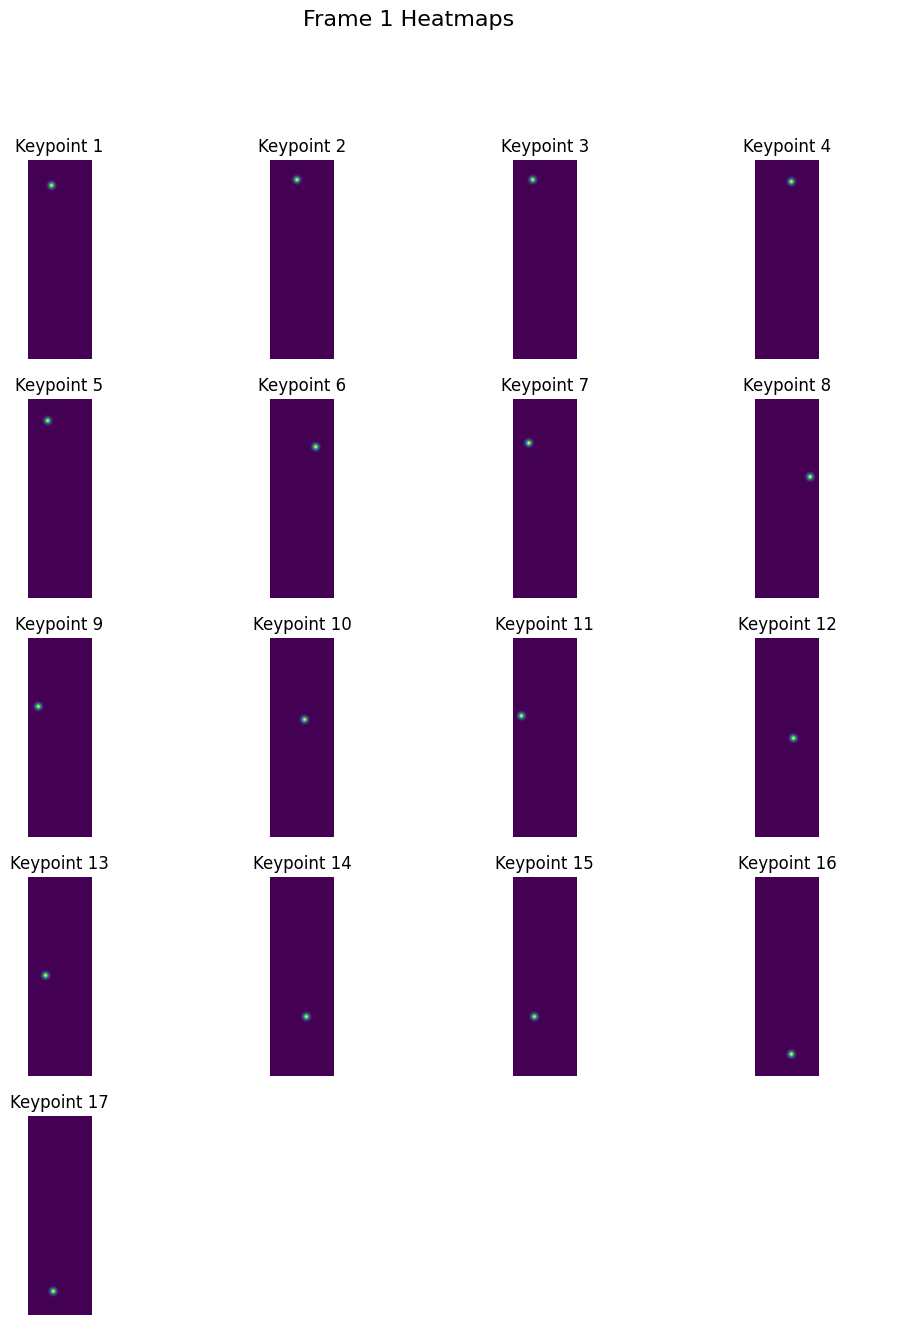

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract frame 1 heatmaps (index 0 since Python is zero-indexed)
frame_idx = 0
frame_heatmaps = generated_heatmaps[frame_idx]  # Shape: (17, height, width)

# Number of keypoints and grid size for subplots
num_keypoints = frame_heatmaps.shape[0]
grid_rows = int(np.ceil(np.sqrt(num_keypoints)))  # Rows in grid
grid_cols = int(np.ceil(num_keypoints / grid_rows))  # Columns in grid

# Create a figure with subplots
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 3, grid_rows * 3))
fig.suptitle("Frame 1 Heatmaps", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each keypoint heatmap
for kp_idx in range(num_keypoints):
    heatmap = frame_heatmaps[kp_idx]  # Shape: (height, width)
    ax = axes[kp_idx]
    ax.imshow(heatmap)
    ax.axis('off')
    ax.set_title(f"Keypoint {kp_idx + 1}")

# Hide any unused subplots
for ax in axes[num_keypoints:]:
    ax.axis('off')





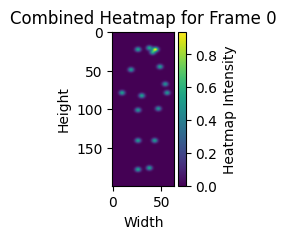

In [ ]:
# Combine keypoints by summing across axis 1 (keypoints)
combined_heatmap = np.sum(generated_heatmaps, axis=1)  # Shape: (96, 200, 64)

# Normalize the combined heatmap for better visualization
normalized_heatmap = (combined_heatmap - combined_heatmap.min()) / (combined_heatmap.max() - combined_heatmap.min())

# Plot a single frame (e.g., frame 0)
plt.figure(figsize=(1, 2))
plt.imshow(normalized_heatmap[0], cmap='viridis', aspect='auto')
plt.colorbar(label='Heatmap Intensity')
plt.title("Combined Heatmap for Frame 0")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()




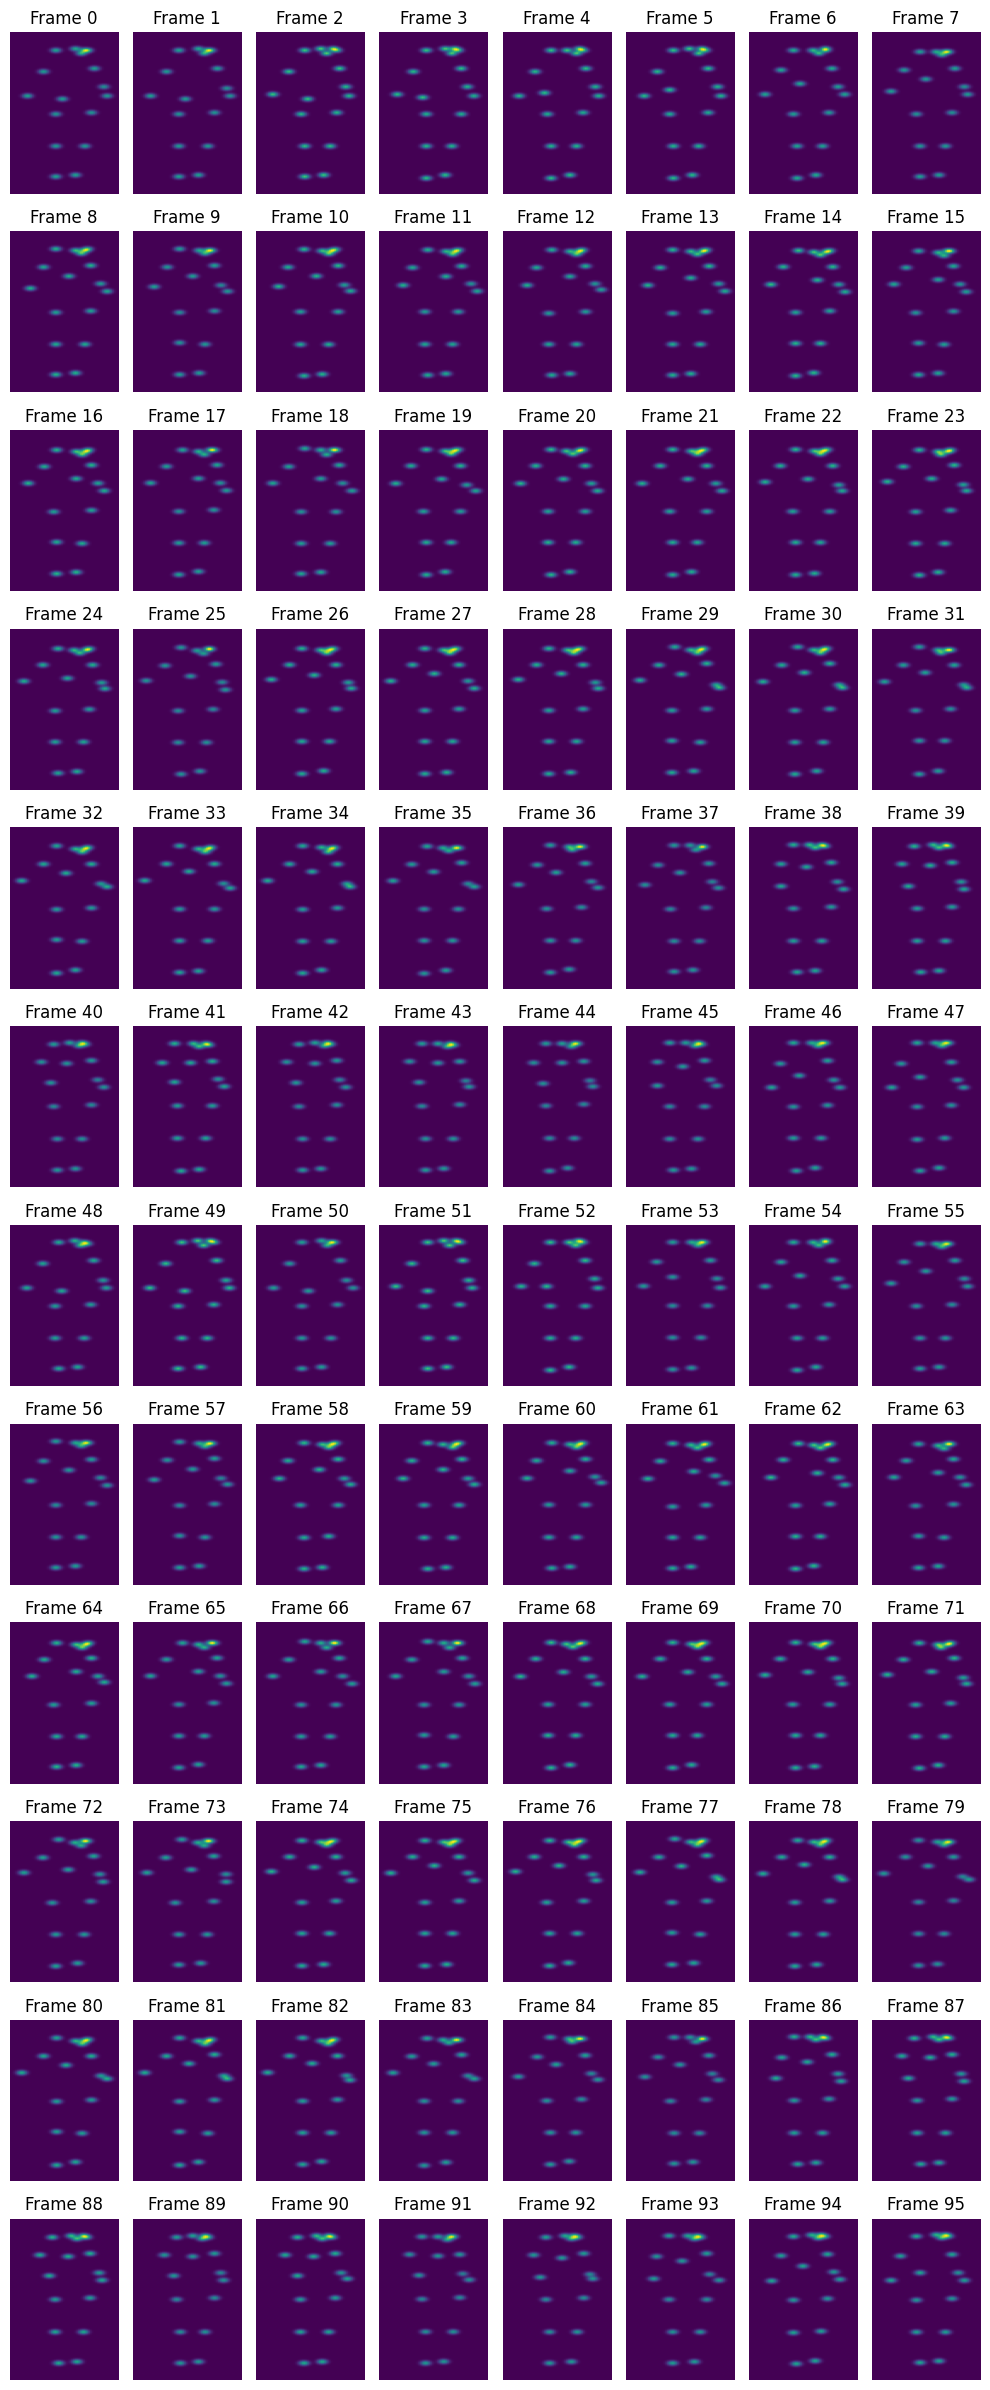

In [ ]:
# Combine keypoints by summing across axis 1 (keypoints)
combined_heatmap = np.sum(generated_heatmaps, axis=1)  # Shape: (96, 200, 64)

# Normalize the combined heatmap for better visualization
normalized_heatmap = (combined_heatmap - combined_heatmap.min()) / (combined_heatmap.max() - combined_heatmap.min())
# Number of frames
num_frames = normalized_heatmap.shape[0]

# Set up the grid for plotting all frames
num_columns = 8  # Number of columns in the grid
num_rows = (num_frames // num_columns) + (num_frames % num_columns > 0)  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, num_rows * 2))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each frame and plot
for i in range(num_frames):
    ax = axes[i]
    ax.imshow(normalized_heatmap[i], cmap='viridis', aspect='auto')
    ax.set_title(f"Frame {i}")
    ax.axis('off')  # Turn off axis labels for a cleaner look

# If there are extra subplots (for the remaining space), hide them
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Format Shape**

In [ ]:
from pyskl.datasets.pipelines.formatting import FormatShape

# Prepare the results dictionary
results = {
    'imgs': generated_heatmaps,          # Key for the image/heatmap data
    'num_clips': 2,           # Number of clips (arbitrary, based on pipeline design)
    'clip_len': 48,           # Clip length (e.g., 48 frames per clip)
}

# Initialize the FormatShape transformer
format_shape_transform = FormatShape(input_format='NCTHW_Heatmap')

# Apply the transformation
formatted_results = format_shape_transform(results)


In [ ]:
print(formatted_results)

{'imgs': array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
        